In [171]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [172]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

In [173]:
df = pd.read_csv("Car_price.csv")

In [174]:
df['Model'].nunique()

2736

In [175]:
df['Make'].nunique()

58

In [176]:
df.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [177]:
df.isna().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [178]:
df.duplicated().sum()

np.int64(30)

In [179]:
df.drop_duplicates(inplace=True)

In [180]:
df.drop(columns='Vin',inplace=True)

In [181]:
df.describe()

,Price,Year,Mileage
count,852092.000000,852092.000000,8.520920e+05
mean,21464.323952,2013.289097,5.250825e+04
std,13596.350808,3.415016,4.198932e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218700e+04
max,499500.000000,2018.000000,2.856196e+06


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852092 entries, 0 to 852121
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852092 non-null  int64 
 1   Year     852092 non-null  int64 
 2   Mileage  852092 non-null  int64 
 3   City     852092 non-null  object
 4   State    852092 non-null  object
 5   Make     852092 non-null  object
 6   Model    852092 non-null  object
dtypes: int64(3), object(4)
memory usage: 52.0+ MB


In [183]:
df['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [184]:
df['City'].nunique()

2553

In [185]:
state_expanded= {
    'TX': 'Texas', 'NY': 'New York', 'CO': 'Colorado', 'UT': 'Utah',
    'FL': 'Florida', 'CT': 'Connecticut', 'ID': 'Idaho', 'ND': 'North Dakota',
    'CA': 'California', 'NJ': 'New Jersey', 'OH': 'Ohio', 'VA': 'Virginia',
    'IN': 'Indiana', 'AZ': 'Arizona', 'OR': 'Oregon', 'KS': 'Kansas',
    'NE': 'Nebraska', 'MA': 'Massachusetts', 'MD': 'Maryland',
    'GA': 'Georgia', 'MN': 'Minnesota', 'HI': 'Hawaii', 'LA': 'Louisiana',
    'NM': 'New Mexico', 'IL': 'Illinois', 'AL': 'Alabama',
    'PA': 'Pennsylvania', 'SC': 'South Carolina', 'NC': 'North Carolina',
    'WA': 'Washington', 'WI': 'Wisconsin', 'OK': 'Oklahoma',
    'KY': 'Kentucky', 'MS': 'Mississippi', 'MO': 'Missouri',
    'ME': 'Maine', 'AR': 'Arkansas', 'MI': 'Michigan',
    'NV': 'Nevada', 'TN': 'Tennessee', 'NH': 'New Hampshire',
    'DE': 'Delaware', 'WV': 'West Virginia', 'VT': 'Vermont',
    'SD': 'South Dakota', 'IA': 'Iowa', 'RI': 'Rhode Island',
    'MT': 'Montana', 'DC': 'District of Columbia', 'AK': 'Alaska',
    'WY': 'Wyoming'
}


Renaming

In [186]:
df.rename(columns={'Make': 'Company'}, inplace=True)


In [187]:
df.rename(columns={'STATE': 'State'}, inplace=True)


In [188]:
df.rename(columns={'Mileage': 'Km_driven'}, inplace=True)


In [189]:
df.columns

Index(['Price', 'Year', 'Km_driven', 'City', 'State', 'Company', 'Model'], dtype='object')

Feature Enginnering

In [190]:
df['State'] = df['State'].str.strip().str.upper().map(state_expanded)

In [191]:
df['Age']=2025-df['Year']

In [192]:
df["Km_driven1"]=df['Km_driven']

In [193]:
df["Km_driven"] = np.log1p(df["Km_driven1"])

In [194]:
df=df.drop(columns='Km_driven1')

Boxplot

Boxplot of Price


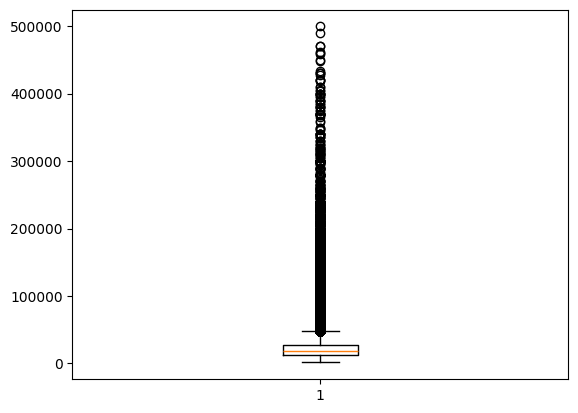

Boxplot of Year


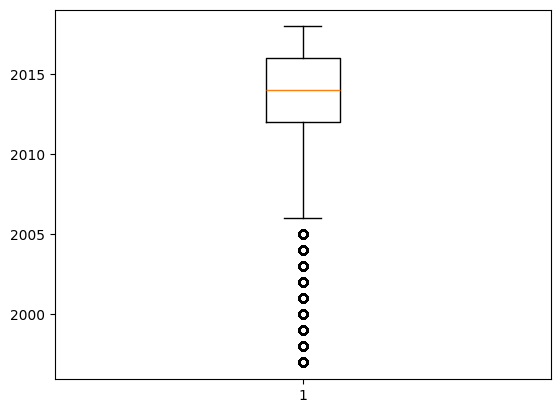

Boxplot of Km_driven


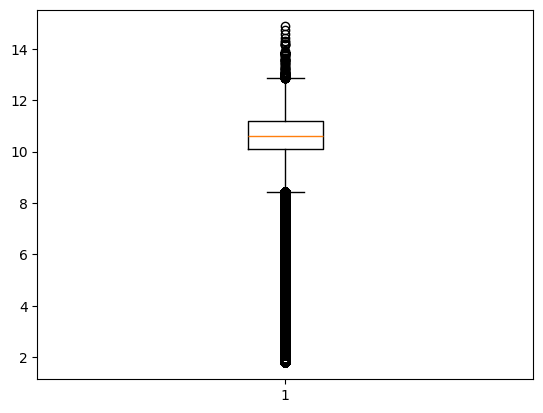

Boxplot of Age


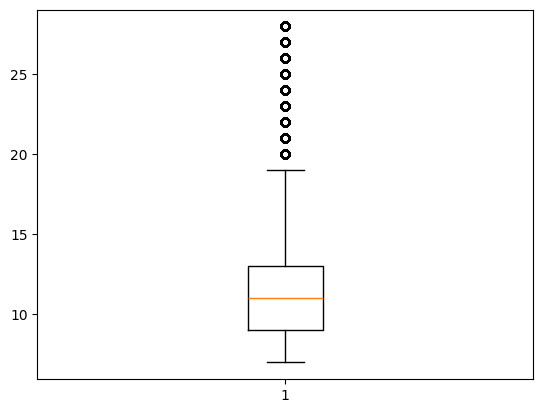

In [195]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        print(f"Boxplot of {i}")
        plt.boxplot(df[i])
        plt.show()

In [196]:
df.loc[df['Age']>20]

,Price,Year,Km_driven,City,State,Company,Model,Age
97,8572,2004,10.845329,Fairfax,Virginia,Acura,TSXAutomatic,21
821,8195,2004,11.178473,Streamwood,Illinois,Acura,TSXAutomatic,21
1000,7995,2004,11.294832,Houston,Texas,Acura,TSXAutomatic,21
1282,5995,2004,11.667285,Fredericksburg,Virginia,Acura,TSXAutomatic,21
1311,6985,2004,11.573578,North Hollywood,California,Acura,TSXAutomatic,21
...,...,...,...,...,...,...,...,...
851771,4990,1998,11.477754,Fairfax,Virginia,Volvo,S704dr,27
851774,3999,1998,11.600927,Longmont,Colorado,Volvo,S704dr,27
851804,5000,1999,11.917443,Bremerton,Washington,Volvo,V70A,26
851925,3111,2001,12.219443,Odessa,Texas,Volvo,V702.4,24


In [197]:
df["Km_driven"].describe()


count    852092.000000
mean         10.501002
std           1.075524
min           1.791759
25%          10.078994
50%          10.603039
75%          11.187029
max          14.865002
Name: Km_driven, dtype: float64

In [198]:
df = df[df["Km_driven"] <= 800000]

In [199]:
df["Price"].describe()

count    852092.000000
mean      21464.323952
std       13596.350808
min        1500.000000
25%       13000.000000
50%       18500.000000
75%       26995.000000
max      499500.000000
Name: Price, dtype: float64

In [200]:
df.loc[df['Price']>200000]

,Price,Year,Km_driven,City,State,Company,Model,Age
11252,205488,2017,6.664409,Mt. Juliet,Tennessee,Aston,Martin,8
11253,204950,2015,6.936343,Bellevue,Washington,Aston,Martin,10
11254,209874,2017,8.158516,Greensboro,North Carolina,Aston,Martin,8
11255,212993,2017,8.857800,West Palm Beach,Florida,Aston,Martin,8
11256,219999,2017,7.521859,Downers Grove,Illinois,Aston,Martin,8
...,...,...,...,...,...,...,...,...
724004,339951,2017,7.459915,West Palm Beach,Florida,Rolls-Royce,DawnConvertible,8
724005,339888,2015,9.462654,Costa Mesa,California,Rolls-Royce,Phantom,10
724006,358880,2015,8.214736,Fort Lauderdale,Florida,Rolls-Royce,Phantom,10
724007,379995,2014,8.476163,Dallas,Texas,Rolls-Royce,PhantomSedan,11


In [201]:
df = df[df["Price"] <= 200000]

In [202]:
df.shape

(851750, 8)

In [203]:
df=df.drop(columns='Age')

Data Preprocessing

In [204]:
x=df.drop(columns='Price',)
y=df['Price']

Data Splitting

In [205]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [206]:
feature_columns=x_train.columns.tolist()

In [207]:
company_models_map = x_train.groupby("Company")["Model"].unique().apply(list).to_dict()

In [208]:
state_city_map = x_train.groupby("State")["City"].unique().apply(list).to_dict()

Model Training

In [209]:
model=CatBoostRegressor(iterations=300,learning_rate=0.1,depth=6,verbose=False)
categorical_features = ['City','Company','Model','State']
model.fit(x_train,y_train,cat_features=categorical_features)
y_pred=model.predict(x_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

MAE: 2892.1725316965394
RMSE: 5250.426946214653
R2 Score: 0.8228839285350197
MSE: 27566983.117536932


In [210]:
import pickle 
data={'model':model,"feature_columns":feature_columns ,"company_models_map": company_models_map,'state_city_map':state_city_map,'df':df}
with open('car_price.pkl','wb') as obj1:
    pickle.dump(data,obj1)